In [4]:
pip install tensorflow pandas numpy matplotlib opencv-python

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
# Load and Preprocess the data
batch_size = 32
img_height = 48
img_width = 48

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth = 7)))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth = 7)))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth = 7)))

Found 28709 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


In [14]:
# Build the Model
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (img_height, img_width,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)), 
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(7,activation = 'softmax')
    ])

model.compile(optimizer ='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\CITS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the Model
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30
)

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 172s 183ms/step - accuracy: 0.2562 - loss: 1.8008 - val_accuracy: 0.4246 - val_loss: 1.4856
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.4117 - loss: 1.5146 - val_accuracy: 0.4854 - val_loss: 1.3521
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.4709 - loss: 1.3767 - val_accuracy: 0.5071 - val_loss: 1.2928
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.5015 - loss: 1.2997 - val_accuracy: 0.5224 - val_loss: 1.2421
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 76s 85ms/step - accuracy: 0.5260 - loss: 1.2455 - val_accuracy: 0.5414 - val_loss: 1.2123
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 115s 128ms/step - accuracy: 0.5438 - loss: 1.2024 - val_accuracy: 0.5436 - val_loss: 1.1954
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 98s 79ms/step - accuracy: 0.5619 - loss: 1.1592 - val_accuracy: 0.5489 - val_loss: 1.1837
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 75s 83ms/step - accuracy: 0.5698 - loss: 1.122

In [18]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 25s 222ms/step - accuracy: 0.5489 - loss: 1.7485
Test Loss: 1.7354649305343628
Test Accuracy: 0.5491780638694763


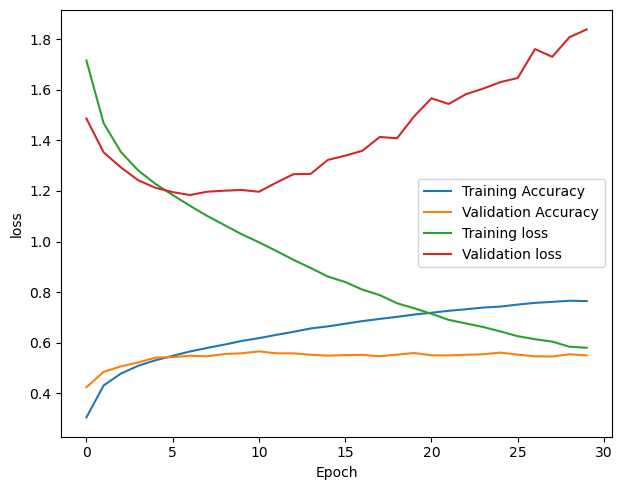

In [20]:
# Visualize Training History
plt.figure(figsize=(12,5))
#plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
#Prediction (Inference)
def predict_emotion(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(48,48))
    img = img.reshape(1,48,48,1)/255.0
    prediction = model.predict(img)
    emotion_label = ['Angry','Disgust', 'Fear','Happy','Sad','Neutral', 'Surprise']
    predicted_emotion = emotion_label[np.argmax(prediction)]
    return predicted_emotion

In [38]:
#Example
image_path = 'image1.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Emotion: Happy
